

[-0.5; 1.3541019662496847]


[-0.5; 0.6458980337503153]


[-0.5; 0.20820393249936942]


[-0.22949016875157646; 0.20820393249936942]


[-0.06230589874905412; 0.20820393249936942]


[-0.06230589874905412; 0.10487837125347005]


[-0.06230589874905412; 0.041019662496845966]


[-0.022839046259778117; 0.041019662496845966]


[-0.022839046259778117; 0.016627806229496105]


[-0.007764050037851973; 0.016627806229496105]


[-0.007764050037851973; 0.007310946184071283]


[-0.0020059138613506503; 0.007310946184071283]


[-0.0020059138613506503; 0.003752222315145994]


[-0.0020059138613506503; 0.0015528100075699602]


[-0.0006466023000060734; 0.0015528100075699602]


[-0.0006466023000060734; 0.0007127092613507533]


[-0.0006466023000060734; 0.00019349844622538331]
Золотое сечение: -0.00022655192689034504 0.00022660325072793055 18
Дихотомия: 0.0002113037109374814 0.0002113483586233117 12


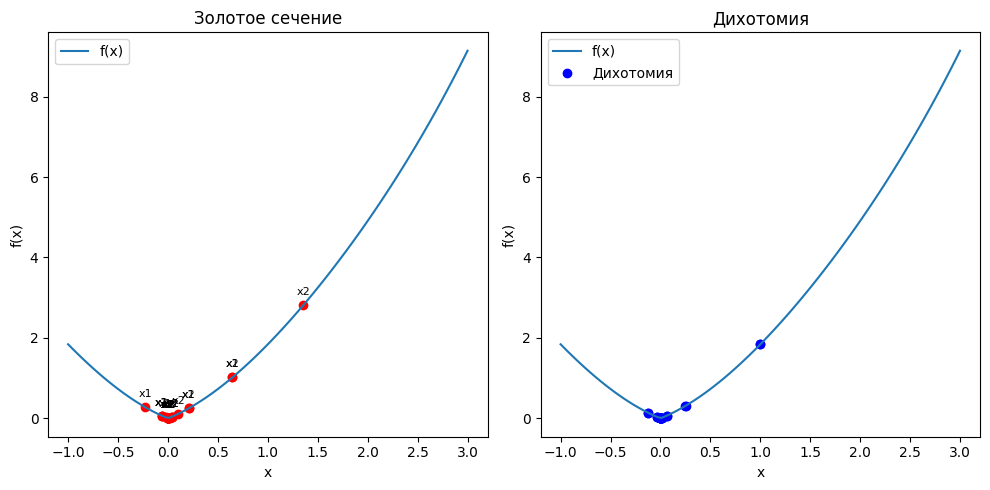

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return x ** 2 + abs(math.sin(x))

# Метод золотого сечения
def golden_ratio(f, a, b, epsilon):
    x2 = a + ((math.sqrt(5) - 1) / 2) * (b - a)
    x1 = a + b - x2
    N = 1
    x_points = [x1, x2]
    y_points = [f(x1), f(x2)]
    labels = ['x1', 'x2']
    iter = 0

    while (b - a > epsilon) or (iter == 2):
        if f(x1) < f(x2):
            b = x2
            x2 = x1
            x1 = a + b - x2
        else:
            a = x1
            x1 = x2
            x2 = a + ((math.sqrt(5) - 1) / 2) * (b - a)
        print('\n')
        print(f"[{a}; {b}]")
        N += 1
        x_points.append(x1)
        x_points.append(x2)
        y_points.append(f(x1))
        y_points.append(f(x2))
        labels.append('x1')
        labels.append('x2')
        iter +=1


    x = (a + b) / 2
    fx = f(x)
    return (x, fx, N, x_points, y_points, labels)

# Метод дихотомии
def dichotomy(f, a, b, epsilon):
    delta = epsilon / 2
    N = 0
    x_points = []
    y_points = []

    while (b - a) / 2 > epsilon:
        x1 = (a + b) / 2 - delta
        x2 = (a + b) / 2 + delta

        f1 = f(x1)
        f2 = f(x2)

        x_points.extend([x1, x2])
        y_points.extend([f1, f2])

        if f1 < f2:
            b = x2
        else:
            a = x1

        N += 1

    x_min = (a + b) / 2
    f_min = f(x_min)

    return (x_min, f_min, N, x_points, y_points)

# Золотое сечение
x_golden, fx_golden, N_golden, x_points_golden, y_points_golden, labels_golden = golden_ratio(f, -0.5, 2.5, 0.001)
print("Золотое сечение:", x_golden, fx_golden, N_golden)

# Дихотомия
x_dichotomy, fx_dichotomy, N_dichotomy, x_points_dichotomy, y_points_dichotomy = dichotomy(f, -0.5, 2.5, 0.001)
print("Дихотомия:", x_dichotomy, fx_dichotomy, N_dichotomy)

# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

x_values = np.linspace(-1, 3, 100)
y_values = [f(x) for x in x_values]

# График золотого сечения
axes[0].plot(x_values, y_values, label='f(x)')
for i, (x, y) in enumerate(zip(x_points_golden, y_points_golden)):
    axes[0].scatter(x, y, c='red')
    axes[0].text(x, y + 0.2, labels_golden[i], ha='center', va='bottom', fontsize=8)

axes[0].set_xlabel('x')
axes[0].set_ylabel('f(x)')
axes[0].set_title('Золотое сечение')
axes[0].legend()

# График дихотомии
axes[1].plot(x_values, y_values, label='f(x)')
axes[1].scatter(x_points_dichotomy, y_points_dichotomy, c='blue', label='Дихотомия')
axes[1].set_xlabel('x')
axes[1].set_ylabel('f(x)')
axes[1].set_title('Дихотомия')
axes[1].legend()

plt.tight_layout()
plt.show()
